# Model building


In [2]:
#installing required libraries

In [3]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [5]:
#importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

from IPython.core.display  import HTML
from IPython.display       import Image
from datetime              import date
from tabulate              import tabulate
from scipy.stats           import chi2_contingency

from boruta                import BorutaPy
from sklearn.ensemble      import RandomForestRegressor

from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn.linear_model  import LinearRegression, Lasso
from sklearn.ensemble      import RandomForestRegressor
import xgboost as xgb
from statsmodels.graphics.tsaplots import plot_acf
import random
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal =sns.color_palette()
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings( 'ignore' )

In [7]:
# Load data
df = pd.read_csv("C:\\Users\\govin\\Downloads\\PJMW_MW_Hourly.csv")

# Convert "Datetime" column to datetime data type
df["Datetime"] = pd.to_datetime(df["Datetime"])

# Set "Datetime" column as the index
df = df.set_index("Datetime")


In [8]:
df

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930
...,...
2018-01-01 20:00:00,8401
2018-01-01 21:00:00,8373
2018-01-01 22:00:00,8238


In [48]:
#Discriptive statistics of data

In [49]:
df.describe()

,PJMW_MW
count,143206.000000
mean,5602.375089
std,979.142872
min,487.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


In [50]:
#deleting 487 value row from data

In [51]:
i= df[((df.PJMW_MW == 487))].index
i
df=df.drop(i)

In [52]:
df.describe()

,PJMW_MW
count,143205.000000
mean,5602.410810
std,979.052977
min,2553.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


In [53]:
df

,PJMW_MW
Datetime,
2002-04-01 10:00:00,5722
2002-04-01 11:00:00,5783
2002-04-01 12:00:00,5683
2002-04-01 13:00:00,5637
2002-04-01 14:00:00,5571
...,...
2018-08-02 06:00:00,4826
2018-08-02 07:00:00,5114
2018-08-02 08:00:00,5333


In [54]:
 df=df.sort_values("Datetime")

In [55]:
df

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374
2002-04-01 02:00:00,4306
2002-04-01 03:00:00,4322
2002-04-01 04:00:00,4359
2002-04-01 05:00:00,4436
...,...
2018-08-02 20:00:00,6545
2018-08-02 21:00:00,6496
2018-08-02 22:00:00,6325


In [56]:
print(df.isnull().sum())

PJMW_MW    0
dtype: int64


there are no null values in our data

In [58]:
# Train and test data

In [59]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Print the number of rows in the train and test sets
print("Number of rows in train set:", len(train))
print("Number of rows in test set:", len(test))

Number of rows in train set: 114564
Number of rows in test set: 28641


80% is train and 20% is test data

In [62]:
train

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374
2002-04-01 02:00:00,4306
2002-04-01 03:00:00,4322
2002-04-01 04:00:00,4359
2002-04-01 05:00:00,4436
...,...
2015-04-27 11:00:00,5459
2015-04-27 12:00:00,5471
2015-04-27 13:00:00,5493


In [63]:
test

,PJMW_MW
Datetime,
2015-04-27 16:00:00,5352
2015-04-27 17:00:00,5373
2015-04-27 18:00:00,5454
2015-04-27 19:00:00,5419
2015-04-27 20:00:00,5618
...,...
2018-08-02 20:00:00,6545
2018-08-02 21:00:00,6496
2018-08-02 22:00:00,6325


In [18]:
#importing smoothing libraries 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from math import sqrt

In [64]:
#Defining Mean Absolute Percentage Error(MAPE)

In [65]:
def MAPE(Y_actual,Y_predicted):
    mape=np.mean(np.abs((Y_actual-Y_predicted)/Y_actual))*100
    return mape

# simple exponential method 

In [66]:
#simple exponential method 
ses_model = SimpleExpSmoothing(np.asarray(train['PJMW_MW'])).fit(smoothing_level=0.6,optimized=False)
pred_ses =ses_model.forecast(len(test))
print("MAPE:",MAPE(pred_ses,test.PJMW_MW))
# report performance
SESrmse = sqrt(mean_squared_error(test, pred_ses))
print('RMSE of simple exponential method: %.3f' %SESrmse)

MAPE: 14.743824513941753
RMSE of simple exponential method: 1008.717


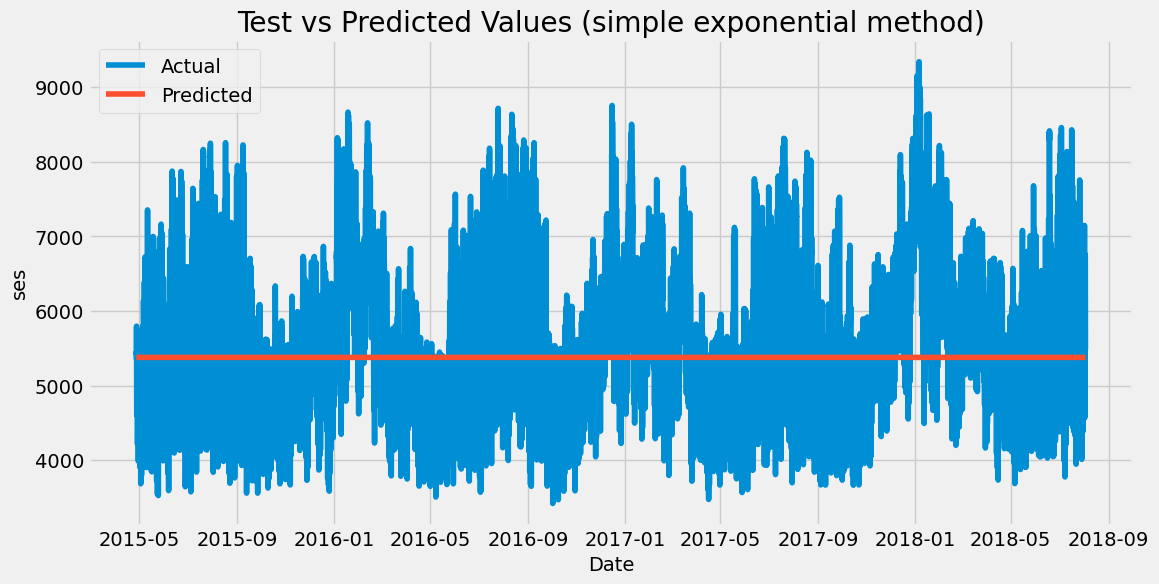

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["PJMW_MW"], label="Actual")
plt.plot(test.index, pred_ses, label="Predicted")
plt.legend(loc="upper left")
plt.title("Test vs Predicted Values (simple exponential method)")
plt.xlabel("Date")
plt.ylabel("ses")
plt.show()

In [70]:
test.index = pd.to_datetime(test.index)

In [71]:
test = test.reset_index(drop=True)

# Holts winter exponential smoothing Method

In [76]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["PJMW_MW"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.forecast(len(test))
#print("MAPE:",MAPE(pred_hwe_add_add,test.PJMW_MW)) 
# report performance
Hrmse = sqrt(mean_squared_error(test['PJMW_MW'],pred_hwe_add_add))
print('RMSE of Holts winter exponential method: %.3f'%Hrmse)

RMSE of Holts winter exponential method: 339290.188


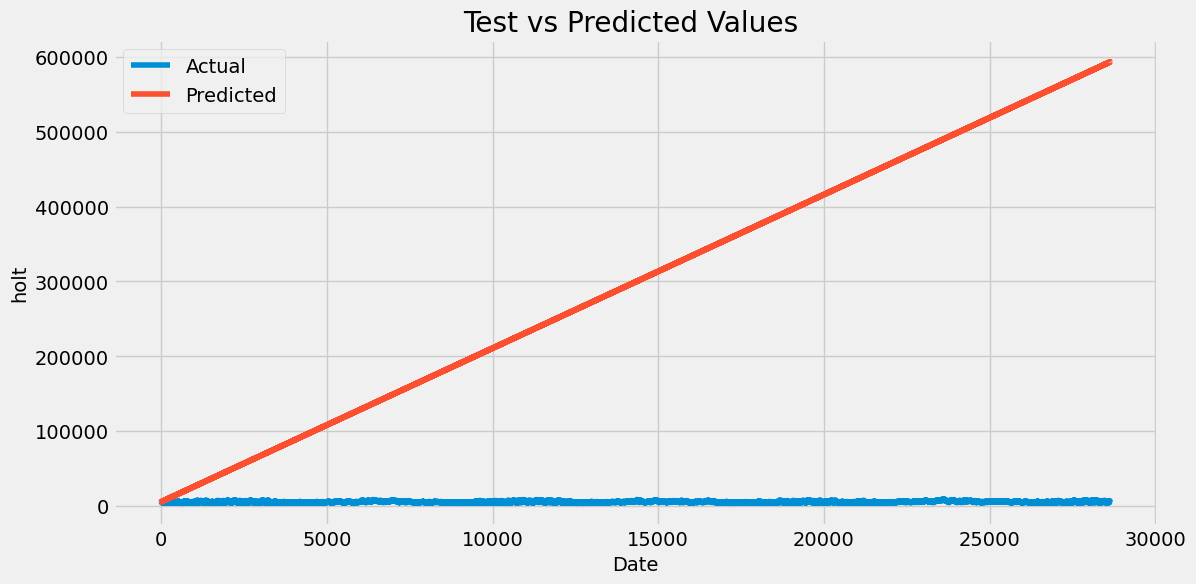

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["PJMW_MW"], label="Actual")
plt.plot(test.index, pred_hwe_add_add, label="Predicted")
plt.legend(loc="upper left")
plt.title("Test vs Predicted Values ")
plt.xlabel("Date")
plt.ylabel("holt")
plt.show()

# AR Model(Auto Regressive Model)

In [78]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Fit AR model
model = AutoReg(train["PJMW_MW"], lags=12)
model_fit = model.fit()

# Make predictions on test set
preds_ar = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
#MAPE
#print("MAPE:",MAPE(preds_ar,test.PJMW_MW)) 
# Calculate RMSE
ARrmse = sqrt(mean_squared_error(test["PJMW_MW"], preds_ar, squared=False))
print('RMSE of AR: %.3f'%ARrmse)

RMSE of AR: 31.570


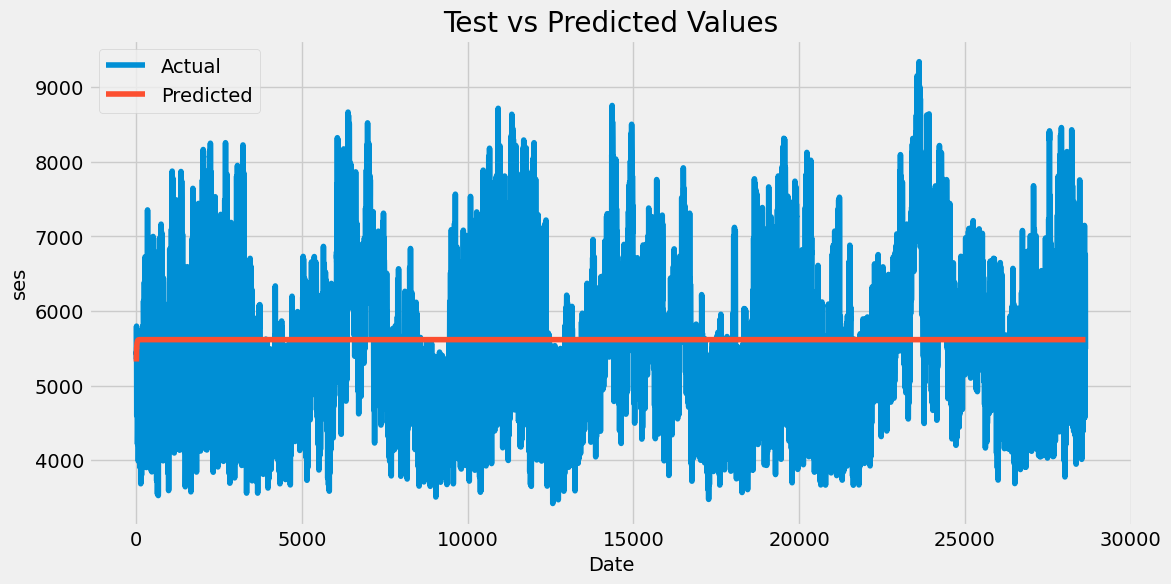

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["PJMW_MW"], label="Actual")
plt.plot(test.index, preds_ar, label="Predicted")
plt.legend(loc="upper left")
plt.title("Test vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("ses")
plt.show()

# ARIMA Model

In [80]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit MA model
model = ARIMA(train["PJMW_MW"], order=(0, 0, 1))
model_fit = model.fit()

# Make predictions on test set
preds_arima = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
ARIMArmse = sqrt(mean_squared_error(test["PJMW_MW"], preds_arima, squared=False))
print('RMSE of ARIMA: %.3f'%ARIMArmse)


RMSE of ARIMA: 31.571


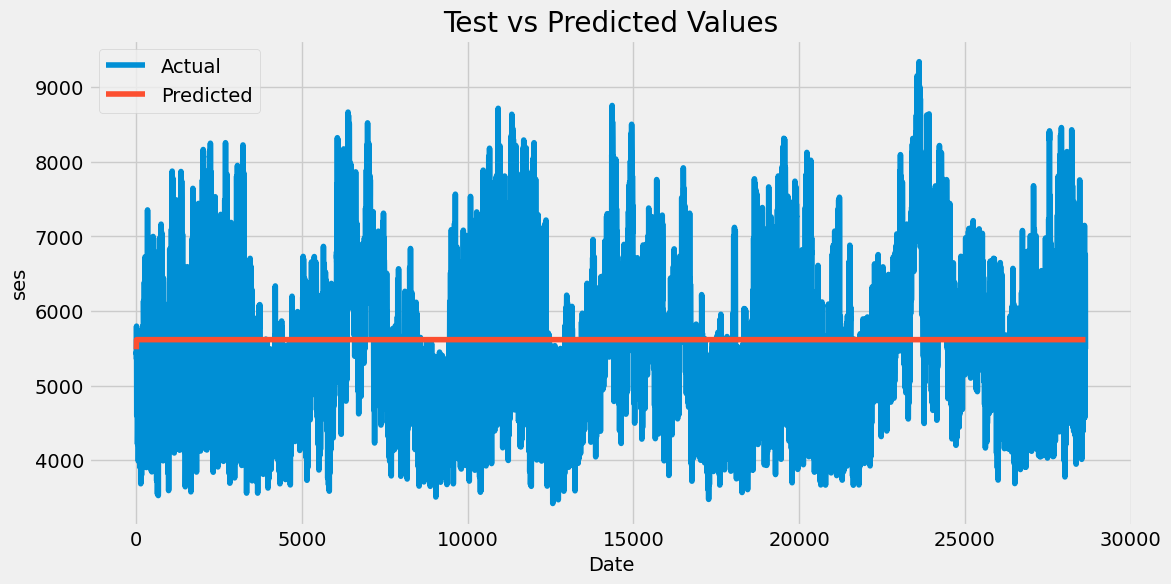

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["PJMW_MW"], label="Actual")
plt.plot(test.index, preds_arima, label="Predicted")
plt.legend(loc="upper left")
plt.title("Test vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("ses")
plt.show()

# XGBoost Model

In [82]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Create features
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define X and y for train and test sets
X_train, y_train = train.drop("PJMW_MW", axis=1), train["PJMW_MW"]
X_test, y_test = test.drop("PJMW_MW", axis=1), test["PJMW_MW"]

# Create XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1)

# Train model on train set
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10, verbose=False)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 715.5112402769417


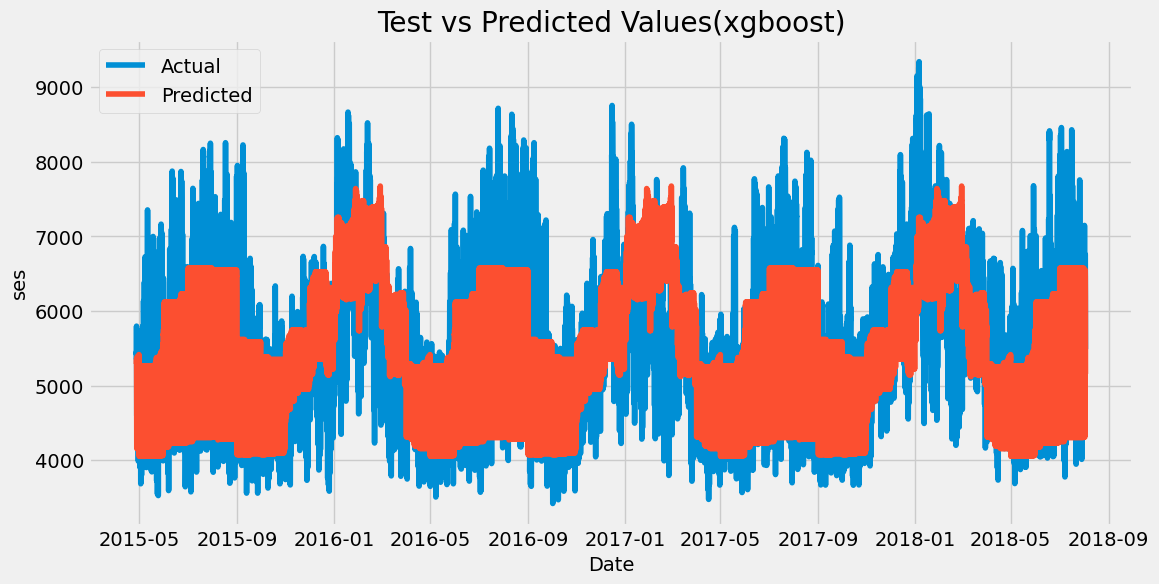

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["PJMW_MW"], label="Actual")
plt.plot(test.index, y_pred, label="Predicted")
plt.legend(loc="upper left")
plt.title("Test vs Predicted Values(xgboost)")
plt.xlabel("Date")
plt.ylabel("ses")
plt.show()

In [84]:
print("RMSE OF SEASONAL EXPONENTIAL MODEL:",SESrmse)
print("RMSE OF Holts winter exponential MODEL:",Hrmse)
print("RMSE OF AR MODEL:",ARrmse)
print("RMSE OF ARIMA MODEL:",ARIMArmse)
print("RMSE OF xgboost MODEL:",rmse)


RMSE OF SEASONAL EXPONENTIAL MODEL: 1008.7167971848235
RMSE OF Holts winter exponential MODEL: 339290.18827220134
RMSE OF AR MODEL: 31.57031116055936
RMSE OF ARIMA MODEL: 31.57079378337239
RMSE OF xgboost MODEL: 715.5112402769417


As we observe the plots of the models we can conclude the XGBoost model as a best model

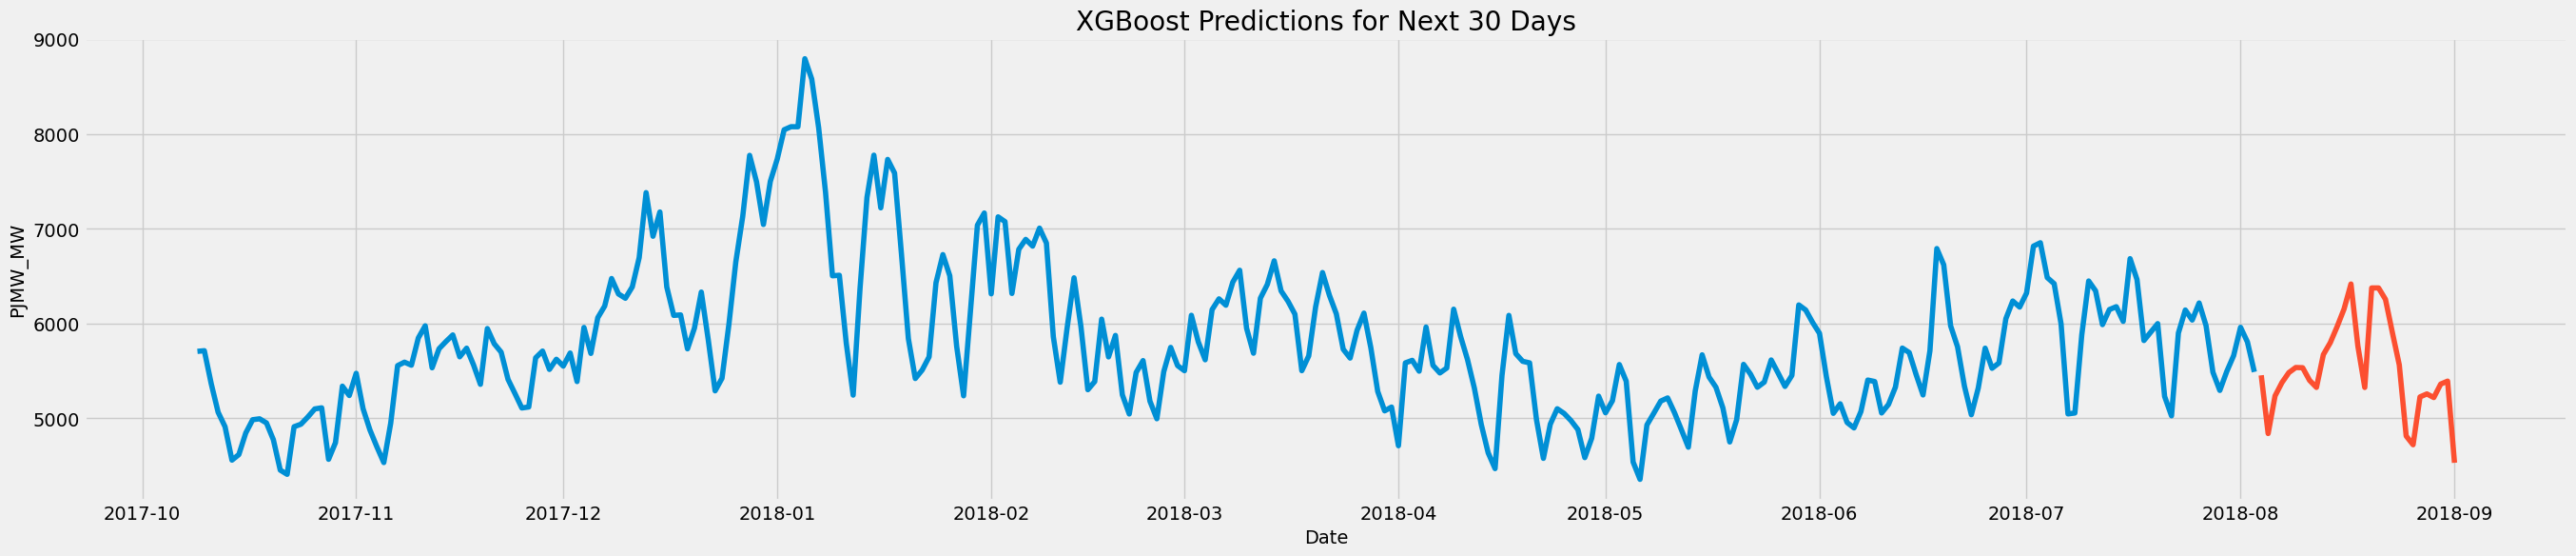

In [108]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:\\Users\\govin\\Downloads\\PJMW_MW_Hourly.csv")
df=df.sort_values("Datetime")

# Convert "Datetime" column to datetime data type
df["Datetime"] = pd.to_datetime(df["Datetime"])

# Set "Datetime" column as the index
df = df.set_index("Datetime")

# Resample to daily frequency and take the mean
df_daily = df.resample("D").mean()

# Create features
df_daily["dayofweek"] = df_daily.index.dayofweek
df_daily["quarter"] = df_daily.index.quarter
df_daily["month"] = df_daily.index.month
df_daily["year"] = df_daily.index.year
df_daily["dayofyear"] = df_daily.index.dayofyear
df_daily["dayofmonth"] = df_daily.index.day
df_daily["weekofyear"] = df_daily.index.weekofyear

# Split the data into training and testing sets
train_size = int(len(df_daily) * 0.95)
train, test = df_daily[:train_size], df_daily[train_size:]

# Define X and y
X_train = train.drop("PJMW_MW", axis=1)
y_train = train["PJMW_MW"]
X_test = test.drop("PJMW_MW", axis=1)
y_test = test["PJMW_MW"]

# Train an XGBoost model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict the next 30 days
last_date = df_daily.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq="d")[1:]
future_features = pd.DataFrame(index=future_dates)
future_features["dayofweek"] = future_features.index.dayofweek
future_features["quarter"] = future_features.index.quarter
future_features["month"] = future_features.index.month
future_features["year"] = future_features.index.year
future_features["dayofyear"] = future_features.index.dayofyear
future_features["dayofmonth"] = future_features.index.day
future_features["weekofyear"] = future_features.index.weekofyear
future_preds = model.predict(future_features)

# Plot the predicted values
plt.figure(figsize=(30, 6))
plt.plot(test.index, test["PJMW_MW"], label="Actual")
plt.plot(future_dates, future_preds,label="Predicted")
plt.xlabel("Date")
plt.ylabel("PJMW_MW")
plt.title("XGBoost Predictions for Next 30 Days")
plt.show()
# save the model
model.save_model("xgboost_model.bin")


In [109]:
print(list[future_preds])

list[array([5453.2427, 4838.569 , 5235.672 , 5376.55  , 5481.6055, 5535.549 ,
       5533.299 , 5400.156 , 5325.4106, 5671.5576, 5797.257 , 5967.943 ,
       6153.6743, 6417.037 , 5762.112 , 5324.789 , 6375.1475, 6375.208 ,
       6254.814 , 5903.964 , 5563.175 , 4812.645 , 4720.24  , 5225.0586,
       5256.8193, 5218.2705, 5360.6016, 5391.6914, 4530.1157],
      dtype=float32)]


In [110]:
print([future_preds][0][1])

4838.569


In [111]:
import pickle
import xgboost as xgb

# assuming you have already trained your XGBoost model and stored it in variable `model`
# save the model to a file
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [112]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [113]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [114]:
import pickle


In [115]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [117]:
# save the knn_model to disk
filename = 'Our_Trained_model.sav'
pickle.dump(model, open(filename, 'wb'))